# CAPSTONE PROJECT - THE BATTLE OF NEIGHBORHOODS
    
    
    
# Introduction & Business Problem :

New Delhi is the capital of India. It is part of the town of Delhi’s eleven districts. The city itself has a populace of 257,803. However, the large metro location has a populace that exceeds 26 million. New Delhi is used interchangeably to consult the National Capital Territory of Delhi (NCT). The official language of New Delhi and the one this is most broadly spoken is Hindi. Nevertheless, English is also spoken as a language within corporations and many agencies. Over the final decades, it is continuously growing due to the metropolis’s vital role in authorities and business. With its diverse culture, there is an diversity in the variety of food provided in New Delhi. Lots of restaurants are available which cater to different tastes of the New Delhi population.  They vary in cuisines, décor, services and ambience. Most of them can be categorized based on their cuisines such as Chinese, Italian, French, etc.

- Here we have categorized the restaurants based on Data Cluster Algorithm: 




# Questions that can be asked using the above mentioned datasets

1. What is the best location in New Delhi City for Chinese Cuisine?
2. What is the best location in New Delhi City for Cafe and Pizza?
3. Which areas have a large number of Chinese Restaurant Market?
4. Which location has the best night clubs in New Delhi City?
5. Which is the best tourist place in New Delhi City
6. Which areas have less number of the restaurant?
7. Which is the best place to stay if I prefer Chinese Cuisine?
8. What places have the best restaurants in New Delhi?


# Data

## The following data will be used for the project :

- New Delhi Restaurant data that contains list Locality, Restaurant name, Rating along with their latitude and longitude. 
    - Data source : https://www.kaggle.com/shrutimehta/zomato-restaurants-data 
- Description: This data set contains the required information. And we will use this data set to explore various locality of the new Delhi city. 
    - Data source: https://developer.foursquare.com/ 
- Description: By using this API we will get all the venues in each neighborhood.


# Approach
- Collect the new Delhi city data from https://www.kaggle.com/shrutimehta/zomatorestaurants-data 
- Using FourSquare API we will find all venues for each neighborhood.
- Filter out all venues that are nearby by locality.
- Using an aggregative rating for each restaurant to find the best places.
- Visualize the Ranking of neighborhoods using folium library(python) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
!pip install geocoder
import geocoder
print('libraries Imported')

libraries Imported


### Lets read the zomato resturant data from csv file

In [2]:
pwd

'C:\\Users\\Hp\\Data Science\\CLUSTER ALGORITHM BASED NEIGHBOURHOOD EXPLORATION TO FIND THE BEST PLACES TO VISIT IN NEW DELHI'

In [3]:
df = pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [4]:
df.shape

(9551, 21)

### Lets take the data of India

In [5]:
df_india = df[df['Country Code'] == 1]
df_india.head()

Restaurant ID                        Restaurant Name  Country Code  City  \
624        3400025                             Jahanpanah             1  Agra   
625        3400341                    Rangrezz Restaurant             1  Agra   
626        3400005                Time2Eat - Mama Chicken             1  Agra   
627        3400021  Chokho Jeeman Marwari Jain Bhojanalya             1  Agra   
628        3400017                         Pinch Of Spice             1  Agra   

                                               Address     Locality  \
624  E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...   Agra Cantt   
625  E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...   Agra Cantt   
626        Main Market, Sadar Bazaar, Agra Cantt, Agra   Agra Cantt   
627  1/48, Delhi Gate, Station Road, Raja Mandi, Ci...  Civil Lines   
628  23/453, Opposite Sanjay Cinema, Wazipura Road,...  Civil Lines   

      Locality Verbose  Longitude   Latitude                        Cuisines  \
624   Agra Cantt, Agra  78.011544  27.161661           North Indian, Mughlai   
625   Agra Cantt, Agra   0.000000   0.000000           North Indian, Mughlai   
626   Agra Cantt, Agra  78.011608  27.160832                    North Indian   
627  Civil Lines, Agra  77.998092  27.195928                      Rajasthani   
628  Civil Lines, Agra  78.007553  27.201725  North Indian, Chinese, Mughlai   

     ...            Currency Has Table booking Has Online delivery  \
624  ...  Indian Rupees(Rs.)                No                  No   
625  ...  Indian Rupees(Rs.)                No                  No   
626  ...  Indian Rupees(Rs.)                No                  No   
627  ...  Indian Rupees(Rs.)                No                  No   
628  ...  Indian Rupees(Rs.)                No                  No   

    Is delivering now Switch to order menu Price range  Aggregate rating  \
624                No                   No           3               3.9   
625                No                   No           2               3.5   
626                No                   No           2               3.6   
627                No                   No           2               4.0   
628                No                   No           3               4.2   

     Rating color Rating text Votes  
624        Yellow        Good   140  
625        Yellow        Good    71  
626        Yellow        Good    94  
627         Green   Very Good    87  
628         Green   Very Good   177  

[5 rows x 21 columns]

In [6]:
df_india.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

### Lets take the data of New Delhi 

In [7]:
df_NDLS = df_india[df_india['City'] =='New Delhi']
df_NDLS.reset_index(drop =True,inplace=True)
df_NDLS.head()

Restaurant ID  Restaurant Name  Country Code       City  \
0       18287358       Food Cloud             1  New Delhi   
1       18216944        Burger.in             1  New Delhi   
2         313333  Days of the Raj             1  New Delhi   
3       18384127   Dilli Ka Dhaba             1  New Delhi   
4            582        Govardhan             1  New Delhi   

                                             Address    Locality  \
0                              Aaya Nagar, New Delhi  Aaya Nagar   
1        84, Near Honda Showroom, Adchini, New Delhi     Adchini   
2  81/3, 1st Floor, Qutub Residency, Adchini, New...     Adchini   
3  66 A, Ground Floor, Sri Aurobindo Marg, Adchin...     Adchini   
4  84, Adjacent Hero Motor Bike Showroom, Main Me...     Adchini   

        Locality Verbose  Longitude   Latitude  \
0  Aaya Nagar, New Delhi   0.000000   0.000000   
1     Adchini, New Delhi  77.196923  28.535382   
2     Adchini, New Delhi  77.197475  28.535493   
3     Adchini, New Delhi  77.198033  28.537547   
4     Adchini, New Delhi  77.196924  28.535523   

                              Cuisines  ...            Currency  \
0                       Cuisine Varies  ...  Indian Rupees(Rs.)   
1                            Fast Food  ...  Indian Rupees(Rs.)   
2   North Indian, Seafood, Continental  ...  Indian Rupees(Rs.)   
3           South Indian, North Indian  ...  Indian Rupees(Rs.)   
4  South Indian, North Indian, Chinese  ...  Indian Rupees(Rs.)   

  Has Table booking Has Online delivery Is delivering now  \
0                No                  No                No   
1                No                 Yes                No   
2               Yes                 Yes                No   
3                No                  No                No   
4                No                 Yes                No   

  Switch to order menu Price range  Aggregate rating  Rating color  \
0                   No           2               0.0         White   
1                   No           1               3.2        Orange   
2                   No           3               3.4        Orange   
3                   No           2               2.6        Orange   
4                   No           2               3.4        Orange   

  Rating text Votes  
0   Not rated     2  
1     Average    46  
2     Average    45  
3     Average    11  
4     Average   238  

[5 rows x 21 columns]

In [8]:
df_NDLS.shape

(5473, 21)

### Now that we have the data of New Delhi, let's start cleaning our data

remove the unwanted columns and rows from dataset

In [9]:
df_NDLS.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [10]:
df_Res = df_NDLS[df_NDLS.Longitude != 0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [11]:
df_Res = df_Res[df_Res['Aggregate rating']!= 0.0]

In [12]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  
1                            Fast Food               3.2     Average     46  
2   North Indian, Seafood, Continental               3.4     Average     45  
3           South Indian, North Indian               2.6     Average     11  
4  South Indian, North Indian, Chinese               3.4     Average    238  
5                              Mughlai               3.1     Average      8

### Now we have our proper data

## Now let's create a map to show the restaurant clusters

In [13]:
New_Delhi_Rest = folium.Map(location=[28.535382,77.196923],zoom_start=15)
X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans =KMeans(n_clusters=5, random_state=0).fit(Z)
clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(New_Delhi_Rest)  

New_Delhi_Rest

In [14]:
pwd

'C:\\Users\\Hp\\Data Science\\CLUSTER ALGORITHM BASED NEIGHBOURHOOD EXPLORATION TO FIND THE BEST PLACES TO VISIT IN NEW DELHI'

In [15]:
New_Delhi_Rest.save('map.png')

In [16]:
New_Delhi_Rest.save('New Delhi Map.html')

In [17]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  \
1                            Fast Food               3.2     Average     46   
2   North Indian, Seafood, Continental               3.4     Average     45   
3           South Indian, North Indian               2.6     Average     11   
4  South Indian, North Indian, Chinese               3.4     Average    238   
5                              Mughlai               3.1     Average      8   

   Cluster  
1        1  
2        1  
3        1  
4        1  
5        1

## Let's see the locality with the higest rating

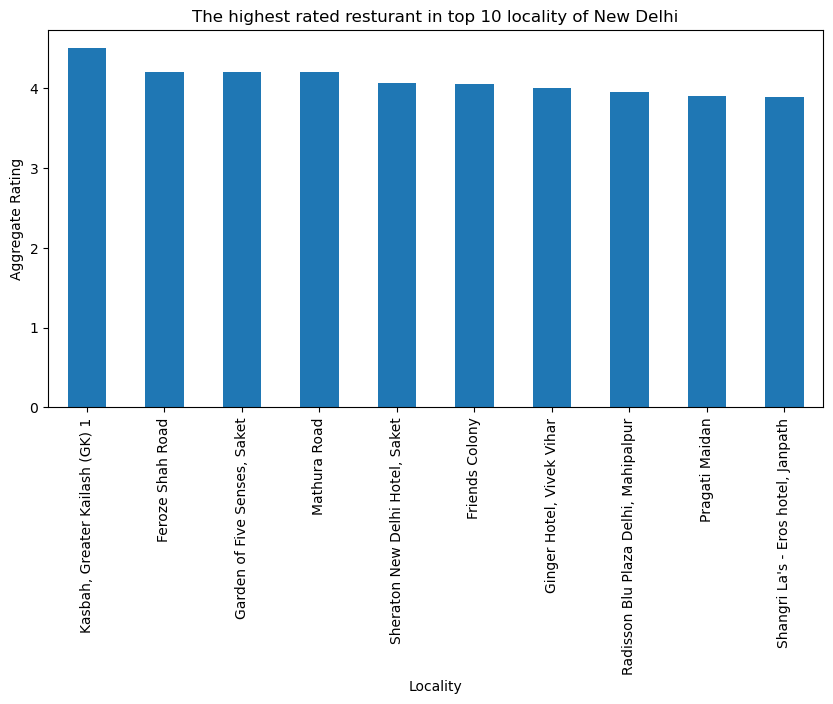

In [18]:
plt.figure(figsize=(10,5),dpi = 100)

plt.title('The highest rated resturant in top 10 locality of New Delhi')
plt.xlabel('Resturant Locality in New Delhi')
plt.ylabel('Aggregate Rating')
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind = 'bar')
plt.show()

#### The top rated restarants are in Kasbah, Greater Kailash area.

## Let's see the locality with the lowest rating

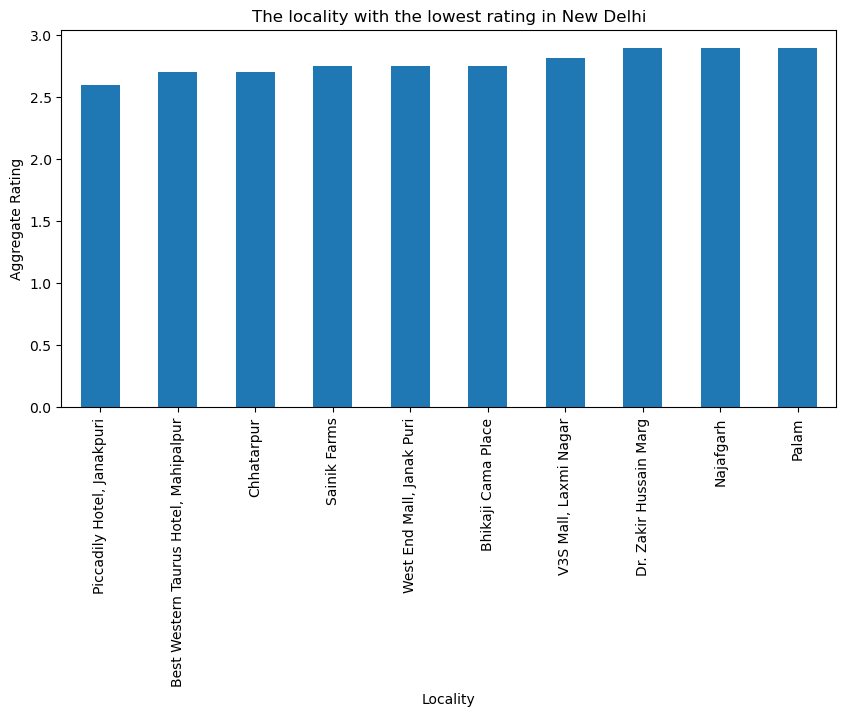

In [19]:
plt.figure(figsize=(10,5),dpi = 100)

plt.title('The locality with the lowest rating in New Delhi')
plt.xlabel('Resturant Locality in New Delhi')
plt.ylabel('Aggregate Rating')
df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind = 'bar')
plt.show()

### The worst restarants are in Piccadily Hotel, Janakpuri.

## Let's see the highest number of restaurents in the locality of New Delhi

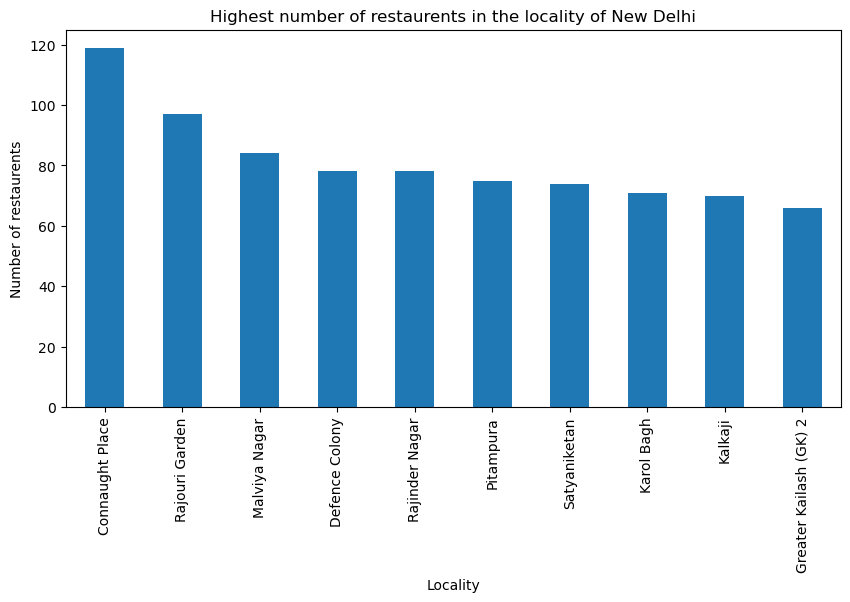

In [20]:
plt.figure(figsize=(10,5),dpi = 100)

plt.title('Highest number of restaurents in the locality of New Delhi')
plt.xlabel('Resturant Locality in New Delhi')
plt.ylabel('Number of restaurents')
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind = 'bar')
plt.show()

## Which is the best places for chinese restaurant in New Delhi

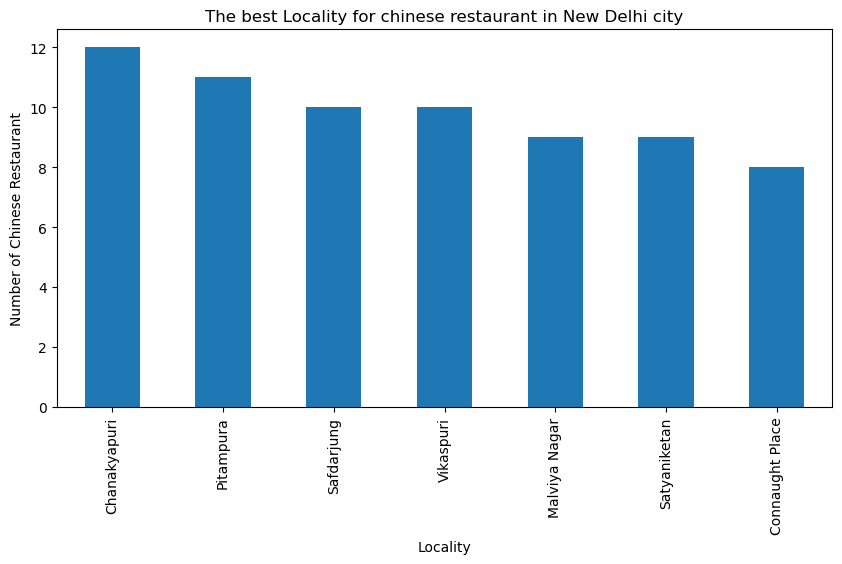

In [21]:
plt.figure(figsize=(10,5),dpi = 100)

plt.title('The best Locality for chinese restaurant in New Delhi city')
plt.xlabel('Resturant Locality in New Delhi')
plt.ylabel('Number of Chinese Restaurant') 

df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(7).plot(kind = 'bar')

plt.show()

### Chanakyapuri is the best place for Chinese restaurant.

## Let's see which chinese restaurent has a good rating

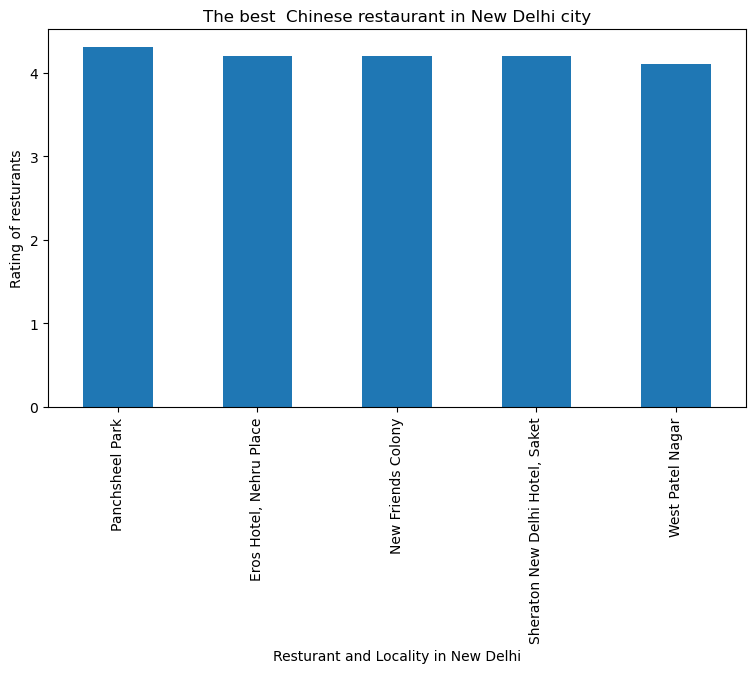

In [22]:
plt.figure(figsize=(9,5), dpi = 100)

plt.title('The best  Chinese restaurant in New Delhi city')



df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant and Locality in New Delhi')

plt.ylabel('Rating of resturants')

plt.show()


### Panchsheel park is best Chinese resturants.

## Grouping the data based on the Locality

In [23]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [24]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']

In [25]:
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  
0                         Average          117  
1  Average, Good, Poor, Very Good         1560  
2                   Average, Good          434  
3                         Average           59  
4                         Average          126

In [26]:
df_final.shape

(240, 8)

## Define Foursquare Credentials and Version

In [27]:
CLIENT_ID = 'K1LZA3U1MYZXQME3KWXDZMJ0GMPWLMKYJHTULRAPM4W5CI1L' # Foursquare ID 

CLIENT_SECRET = 'L1EL0ED3LXFTY5DQCJSJSBRGBEIFSUWPCYSSRQUACXQY3GIB' # Foursquare Secret
VERSION = '20200921' # Foursquare API version

## Function to get all the Locality in New Delhi

In [28]:
# Function to get all the Locality in New Delhi

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]["groups"][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)






### Find all the venues in New Delhi Locality

In [29]:
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )


ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [30]:
new_Delhi_venues.head()

Locality  Locality Latitude  Locality Longitude  \
0  ARSS Mall, Paschim Vihar          28.668945           77.101544   
1  ARSS Mall, Paschim Vihar          28.668945           77.101544   
2  ARSS Mall, Paschim Vihar          28.668945           77.101544   
3  ARSS Mall, Paschim Vihar          28.668945           77.101544   
4  ARSS Mall, Paschim Vihar          28.668945           77.101544   

                         Venue  Venue Latitude  Venue Longitude  \
0                       Subway       28.669999        77.102546   
1                    Pizza Hut       28.670321        77.103853   
2              Café Coffee Day       28.670009        77.102480   
3  Baljeet's Amritsari Koolcha       28.665768        77.100481   
4                  Little Chef       28.670000        77.101459   

       Venue Category  
0      Sandwich Place  
1         Pizza Place  
2         Coffee Shop  
3   Indian Restaurant  
4  Chinese Restaurant

In [31]:
new_Delhi_venues.groupby('Locality').count()

Locality Latitude  Locality Longitude  Venue  \
Locality                                                                       
ARSS Mall, Paschim Vihar                        9                   9      9   
Adchini                                         5                   5      5   
Aditya Mega Mall, Karkardooma                  10                  10     10   
Aerocity                                        7                   7      7   
Aggarwal City Mall, Pitampura                   5                   5      5   
...                                           ...                 ...    ...   
West Gate Mall, Rajouri Garden                 16                  16     16   
West Patel Nagar                                5                   5      5   
Worldmark 1, Aerocity                          28                  28     28   
Yusuf Sarai                                    13                  13     13   
ibis New Delhi, Aerocity                       26                  26     26   

                                Venue Latitude  Venue Longitude  \
Locality                                                          
ARSS Mall, Paschim Vihar                     9                9   
Adchini                                      5                5   
Aditya Mega Mall, Karkardooma               10               10   
Aerocity                                     7                7   
Aggarwal City Mall, Pitampura                5                5   
...                                        ...              ...   
West Gate Mall, Rajouri Garden              16               16   
West Patel Nagar                             5                5   
Worldmark 1, Aerocity                       28               28   
Yusuf Sarai                                 13               13   
ibis New Delhi, Aerocity                    26               26   

                                Venue Category  
Locality                                        
ARSS Mall, Paschim Vihar                     9  
Adchini                                      5  
Aditya Mega Mall, Karkardooma               10  
Aerocity                                     7  
Aggarwal City Mall, Pitampura                5  
...                                        ...  
West Gate Mall, Rajouri Garden              16  
West Patel Nagar                             5  
Worldmark 1, Aerocity                       28  
Yusuf Sarai                                 13  
ibis New Delhi, Aerocity                    26  

[238 rows x 6 columns]

In [32]:
print('There are {} uniques categories.'.format(len(new_Delhi_venues['Venue Category'].unique())))

There are 215 uniques categories.


In [33]:
## Analysing Each Locality

# one hot encoding
new_Delhi_onehot = pd.get_dummies(new_Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Delhi_onehot['Locality'] = new_Delhi_venues['Locality'] 

# move Locality column to the first column
column_list = new_Delhi_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Delhi_onehot = new_Delhi_onehot[column_list]

new_Delhi_onehot.head()

Locality  ATM  Accessories Store  Afghan Restaurant  \
0  ARSS Mall, Paschim Vihar    0                  0                  0   
1  ARSS Mall, Paschim Vihar    0                  0                  0   
2  ARSS Mall, Paschim Vihar    0                  0                  0   
3  ARSS Mall, Paschim Vihar    0                  0                  0   
4  ARSS Mall, Paschim Vihar    0                  0                  0   

   African Restaurant  Airport  Airport Lounge  Airport Service  \
0                   0        0               0                0   
1                   0        0               0                0   
2                   0        0               0                0   
3                   0        0               0                0   
4                   0        0               0                0   

   Airport Terminal  American Restaurant  ...  Trail  Train Station  \
0                 0                    0  ...      0              0   
1                 0                    0  ...      0              0   
2                 0                    0  ...      0              0   
3                 0                    0  ...      0              0   
4                 0                    0  ...      0              0   

   Turkish Restaurant  Udupi Restaurant  Vegetarian / Vegan Restaurant  \
0                   0                 0                              0   
1                   0                 0                              0   
2                   0                 0                              0   
3                   0                 0                              0   
4                   0                 0                              0   

   Vietnamese Restaurant  Whisky Bar  Wine Bar  Wings Joint  Women's Store  
0                      0           0         0            0              0  
1                      0           0         0            0              0  
2                      0           0         0            0              0  
3                      0           0         0            0              0  
4                      0           0         0            0              0  

[5 rows x 216 columns]

In [34]:
New_Delhi_grouped = new_Delhi_onehot.groupby('Locality').mean().reset_index()
New_Delhi_grouped

Locality       ATM  Accessories Store  \
0          ARSS Mall, Paschim Vihar  0.111111           0.000000   
1                           Adchini  0.000000           0.000000   
2     Aditya Mega Mall, Karkardooma  0.000000           0.000000   
3                          Aerocity  0.000000           0.000000   
4     Aggarwal City Mall, Pitampura  0.000000           0.000000   
..                              ...       ...                ...   
233  West Gate Mall, Rajouri Garden  0.000000           0.000000   
234                West Patel Nagar  0.000000           0.000000   
235           Worldmark 1, Aerocity  0.000000           0.035714   
236                     Yusuf Sarai  0.000000           0.000000   
237        ibis New Delhi, Aerocity  0.000000           0.000000   

     Afghan Restaurant  African Restaurant  Airport  Airport Lounge  \
0                  0.0                 0.0      0.0        0.000000   
1                  0.0                 0.0      0.0        0.000000   
2                  0.0                 0.0      0.0        0.000000   
3                  0.0                 0.0      0.0        0.142857   
4                  0.0                 0.0      0.0        0.000000   
..                 ...                 ...      ...             ...   
233                0.0                 0.0      0.0        0.000000   
234                0.0                 0.0      0.0        0.000000   
235                0.0                 0.0      0.0        0.000000   
236                0.0                 0.0      0.0        0.000000   
237                0.0                 0.0      0.0        0.000000   

     Airport Service  Airport Terminal  American Restaurant  ...  Trail  \
0                0.0          0.000000               0.0000  ...    0.0   
1                0.0          0.000000               0.0000  ...    0.0   
2                0.0          0.000000               0.0000  ...    0.0   
3                0.0          0.142857               0.0000  ...    0.0   
4                0.0          0.000000               0.0000  ...    0.0   
..               ...               ...                  ...  ...    ...   
233              0.0          0.000000               0.0625  ...    0.0   
234              0.0          0.000000               0.0000  ...    0.0   
235              0.0          0.000000               0.0000  ...    0.0   
236              0.0          0.000000               0.0000  ...    0.0   
237              0.0          0.000000               0.0000  ...    0.0   

     Train Station  Turkish Restaurant  Udupi Restaurant  \
0         0.000000                 0.0               0.0   
1         0.000000                 0.0               0.0   
2         0.000000                 0.0               0.0   
3         0.000000                 0.0               0.0   
4         0.000000                 0.0               0.0   
..             ...                 ...               ...   
233       0.000000                 0.0               0.0   
234       0.000000                 0.0               0.0   
235       0.035714                 0.0               0.0   
236       0.000000                 0.0               0.0   
237       0.038462                 0.0               0.0   

     Vegetarian / Vegan Restaurant  Vietnamese Restaurant  Whisky Bar  \
0                              0.0                    0.0         0.0   
1                              0.0                    0.0         0.0   
2                              0.0                    0.0         0.0   
3                              0.0                    0.0         0.0   
4                              0.0                    0.0         0.0   
..                             ...                    ...         ...   
233                            0.0                    0.0         0.0   
234                            0.0                    0.0         0.0   
235                            0.0                    0.0         0.0   
236  

In [35]:
New_Delhi_grouped.shape

(238, 216)

In [36]:

## printing each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in New_Delhi_grouped['Locality']:
    print("----"+hood+"----")
    temp = New_Delhi_grouped[New_Delhi_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ARSS Mall, Paschim Vihar----
                venue  freq
0   Indian Restaurant  0.22
1                 ATM  0.11
2              Market  0.11
3         Coffee Shop  0.11
4  Chinese Restaurant  0.11


----Adchini----
               venue  freq
0               Café   0.4
1  Indian Restaurant   0.2
2                Pub   0.2
3   Parsi Restaurant   0.2
4                ATM   0.0


----Aditya Mega Mall, Karkardooma----
               venue  freq
0        Pizza Place   0.2
1          Multiplex   0.2
2      Shopping Mall   0.2
3  Indian Restaurant   0.2
4              Hotel   0.1


----Aerocity----
                  venue  freq
0                 Hotel  0.29
1  Fast Food Restaurant  0.14
2        Airport Lounge  0.14
3           Coffee Shop  0.14
4      Airport Terminal  0.14


----Aggarwal City Mall, Pitampura----
                venue  freq
0    Department Store   0.2
1         Pizza Place   0.2
2   Indian Restaurant   0.2
3  Chinese Restaurant   0.2
4    Business Service   0.2


----Agga

               venue  freq
0              Hotel  0.33
1          BBQ Joint  0.17
2  Indian Restaurant  0.17
3               Café  0.17
4   Asian Restaurant  0.17


----Gourmet Hub, Pashim Vihar----
               venue  freq
0        Pizza Place   0.2
1  Indian Restaurant   0.2
2     Ice Cream Shop   0.2
3             Bakery   0.2
4  Food & Drink Shop   0.2


----Greater Kailash (GK) 1----
               venue  freq
0             Market  0.10
1               Café  0.10
2  Indian Restaurant  0.10
3              Plaza  0.05
4     Ice Cream Shop  0.05


----Greater Kailash (GK) 2----
               venue  freq
0         Restaurant  0.09
1  Indian Restaurant  0.09
2        Pizza Place  0.06
3               Café  0.06
4   Asian Restaurant  0.06


----Greater Kailash (GK) 3----
              venue  freq
0        Restaurant  0.13
1              Café  0.13
2            Bakery  0.13
3    Ice Cream Shop  0.07
4  Asian Restaurant  0.07


----Green Park----
               venue  freq
0        Coff

               venue  freq
0                ATM  0.25
1  Fish & Chips Shop  0.25
2  Convenience Store  0.25
3        Pizza Place  0.25
4        Karaoke Bar  0.00


----Krishna Nagar----
                         venue  freq
0                  Pizza Place  0.50
1                         Park  0.25
2            Accessories Store  0.25
3                    Jazz Club  0.00
4  Northeast Indian Restaurant  0.00


----Lado Sarai----
                    venue  freq
0           Shopping Mall  0.33
1             Golf Course  0.17
2  Furniture / Home Store  0.17
3               BBQ Joint  0.17
4               Nightclub  0.17


----Lajpat Nagar 1----
               venue  freq
0        Coffee Shop  0.12
1        Music Store  0.12
2       Neighborhood  0.12
3             Market  0.12
4  Indian Restaurant  0.12


----Lajpat Nagar 2----
                  venue  freq
0           Pizza Place  0.12
1            Donut Shop  0.08
2  Fast Food Restaurant  0.08
3                  Café  0.08
4     Indian Rest

4      Shopping Mall  0.04


----Punjabi Bagh----
               venue  freq
0         Donut Shop  0.12
1         Hookah Bar  0.12
2      Garden Center  0.12
3  Convenience Store  0.12
4  Indian Restaurant  0.12


----Qutab Institutional Area----
                        venue  freq
0                  Restaurant  0.25
1           Indian Restaurant  0.25
2         Moroccan Restaurant  0.12
3  Modern European Restaurant  0.12
4                  Food Truck  0.12


----R K Puram----
                     venue  freq
0  Comfort Food Restaurant  0.14
1              Coffee Shop  0.14
2         Asian Restaurant  0.14
3                     Park  0.14
4          Thai Restaurant  0.14


----Race Course----
                  venue  freq
0         Women's Store   0.2
1                  Food   0.2
2  Gym / Fitness Center   0.2
3             Racetrack   0.2
4        History Museum   0.2


----Radisson Blu Plaza Delhi, Mahipalpur----
                 venue  freq
0                Hotel  0.29
1           

                           venue  freq
0                    Pizza Place  0.12
1             Chinese Restaurant  0.12
2  Vegetarian / Vegan Restaurant  0.12
3           Fast Food Restaurant  0.12
4                            Bar  0.12


----Vasant Vihar----
                  venue  freq
0                  Café  0.10
1  Fast Food Restaurant  0.07
2           Coffee Shop  0.07
3            Restaurant  0.07
4    Chinese Restaurant  0.07


----Vasundhara Enclave----
                            venue  freq
0                             ATM   1.0
1                   Moving Target   0.0
2  Multicuisine Indian Restaurant   0.0
3                       Multiplex   0.0
4                          Museum   0.0


----Vijay Nagar----
                venue  freq
0                Café  0.21
1              Bakery  0.07
2  Chinese Restaurant  0.07
3           Pet Store  0.07
4  Italian Restaurant  0.07


----Vikas Marg----
           venue  freq
0            ATM   0.2
1       Pharmacy   0.2
2   Burger Joi

In [37]:
## making that into a pandas dataframe
## First, writing a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [38]:
## creating the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = New_Delhi_grouped['Locality']

for ind in np.arange(New_Delhi_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(New_Delhi_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted.head()

Locality 1st Most Common Venue 2nd Most Common Venue  \
0       ARSS Mall, Paschim Vihar     Indian Restaurant        Sandwich Place   
1                        Adchini                  Café     Indian Restaurant   
2  Aditya Mega Mall, Karkardooma           Pizza Place     Indian Restaurant   
3                       Aerocity                 Hotel      Airport Terminal   
4  Aggarwal City Mall, Pitampura           Pizza Place      Business Service   

  3rd Most Common Venue           4th Most Common Venue 5th Most Common Venue  \
0                Market  Multicuisine Indian Restaurant           Coffee Shop   
1      Parsi Restaurant                             Pub         Women's Store   
2         Shopping Mall                       Multiplex                  Café   
3        Airport Lounge             Rental Car Location           Coffee Shop   
4    Chinese Restaurant                Department Store     Indian Restaurant   

       6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0         Chinese Restaurant                   ATM           Pizza Place   
1       Fast Food Restaurant    Frozen Yogurt Shop   Fried Chicken Joint   
2                      Hotel   Fried Chicken Joint     French Restaurant   
3       Fast Food Restaurant     French Restaurant            Food Truck   
4  Indian Chinese Restaurant  Fast Food Restaurant   Fried Chicken Joint   

  9th Most Common Venue 10th Most Common Venue  
0           Flower Shop            Gaming Cafe  
1     French Restaurant             Food Truck  
2            Food Truck             Food Court  
3           Flea Market    Fried Chicken Joint  
4     French Restaurant             Food Truck

In [39]:

## Cluster Locality
## Running k-means to cluster the Locality into 5 clusters.

# setting number of clusters
kclusters = 5

New_Delhi_clustering = New_Delhi_grouped.drop('Locality', 1)

# running k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(New_Delhi_clustering)

# checking cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(238,)

In [41]:
# adding clustering labels
New_Delhi_merged = df_final.head(238)
New_Delhi_merged['Cluster Labels'] = kmeans.labels_

# merging New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
New_Delhi_merged = New_Delhi_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

New_Delhi_merged.head()

<ipython-input-41-b1260d3f7595>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_Delhi_merged['Cluster Labels'] = kmeans.labels_


Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  Cluster Labels  \
0                         Average          117               3   
1  Average, Good, Poor, Very Good         1560               1   
2                   Average, Good          434               3   
3                         Average           59               0   
4                         Average          126               3   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     Indian Restaurant        Sandwich Place                Market   
1                  Café     Indian Restaurant      Parsi Restaurant   
2           Pizza Place     Indian Restaurant         Shopping Mall   
3                 Hotel      Airport Terminal        Airport Lounge   
4           Pizza Place      Business Service    Chinese Restaurant   

            4th Most Common Venue 5th Most Common Venue  \
0  Multicuisine Indian Restaurant           Coffee Shop   
1                             Pub         Women's Store   
2                       Multiplex                  Café   
3             Rental Car Location           Coffee Shop   
4                Department Store     Indian Restaurant   

       6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0         Chinese Restaurant                   ATM           Pizza Place   
1       Fast Food Restaurant    Frozen Yogurt Shop   Fried Chicken Joint   
2                      Hotel   Fried Chicken Joint     French Restaurant   
3       Fast Food Restaurant     French Restaurant            Food Truck   
4  Indian Chinese Restaurant  Fast Food Restaurant   Fried Chicken Joint   

  9th Most Common Venue 10th Most Common Venue  
0           Flower Shop            Gaming Cafe  
1     French Restaurant             Food Truck  
2            Food Truck             Food Court  
3           Flea Market    Fried Chicken Joint  
4     French Restaurant             Food Truck

# **Let's separate all the cluster data**

In [42]:
cluster0 = New_Delhi_merged[New_Delhi_merged['Cluster Labels']==0]
cluster0.to_csv('cluster0.csv')

In [43]:
cluster1 = New_Delhi_merged[New_Delhi_merged['Cluster Labels']==1]
cluster1.to_csv('cluster1.csv')

In [44]:
cluster2 = New_Delhi_merged[New_Delhi_merged['Cluster Labels']==2]
cluster2.to_csv('cluster2.csv')

In [45]:
cluster3 = New_Delhi_merged[New_Delhi_merged['Cluster Labels']==3]
cluster3.to_csv('cluster3.csv')

In [46]:
cluster4 = New_Delhi_merged[New_Delhi_merged['Cluster Labels']==4]
cluster4.to_csv('cluster4.csv')

# **final map**

In [47]:
# creating final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,icon=folium.Icon(icon='cloud'),
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [48]:
map_clusters.save('final map.html')

## Examine Clusters


### Cluster 0


In [49]:
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 0, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
3    28.553077    3.200000                              Average           59   
10   28.554807    3.000000                              Average            4   
12   28.641698    3.050000                              Average           17   
19   28.548827    2.700000                              Average            9   
25   28.495624    2.700000                              Average           23   
35   28.590297    3.350000                        Average, Good          127   
56   28.570246    4.050000                   Average, Excellent         1949   
60   28.665829    4.000000                            Very Good          756   
69   28.550327    3.300000                              Average           30   
70   28.590654    3.550000                        Average, Good          302   
72   28.705700    3.350000                        Average, Good          278   
74   28.621267    3.416667                        Average, Good          475   
83   28.552895    3.300000                              Average           15   
111  28.618772    3.666667             Average, Good, Very Good          725   
112  28.552036    3.500000                                 Good           26   
119  28.545033    2.960000                        Average, Good          259   
125  28.627715    3.125000                        Average, Good          171   
128  28.608252    2.945000                        Average, Good          406   
148  28.642402    3.195652                        Average, Good         2177   
161  28.639872    3.134483                  Average, Good, Poor         1481   
162  28.725814    3.050000                              Average           50   
167  28.599082    2.900000                              Average            9   
168  28.543814    3.950000  Average, Excellent, Good, Very Good         1225   
173  28.714176    3.352083       Average, Good, Poor, Very Good         4514   
188  28.707685    3.168182             Average, Good, Very Good         1668   
196  28.680905    3.320000                        Average, Good          286   
204  28.597038    3.533333             Average, Good, Very Good          902   
212  28.592147    3.350000                        Average, Good          189   
216  28.594859    3.800000                      Good, Very Good          287   
219  28.638846    3.048148                        Average, Good          290   
234  28.630044    2.750000                        Average, Poor          238   
235  28.652978    3.500000                                 Good          178   
237  28.550257    3.220000                        Average, Good           77   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
3                 0                 Hotel      Airport Terminal   
10                0                 Hotel           Coffee Shop   
12                0                Hostel                 Hotel   
19                0                 Hotel     Accessories Store   
25                0     Indian Restaurant         Luggage Store   
35                0                 Hotel           Pizza Place   
56                0                 Hotel                  Café   
60                0                 Hotel      Asian Restaurant   
69                0                 Hotel     Indian Restaurant   
70                0                 Hotel            Restaurant   
72                0                  Park           Coffee Shop   
74                0                 Hotel     Indian Restaurant   
83                0                 Hotel     Indian Restaurant   
111               0                 Hotel     Indian Restaurant   
112               0                 Hotel     Indian Restaurant   
119               0                 Hotel     Indian Restaurant   
125               0            Restaurant            Food Truck   
128               0                 Hotel         Women's Store   
148              

### cluster 1

In [50]:
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 1, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
1    28.537063    3.292308       Average, Good, Poor, Very Good         1560   
7    28.541298    3.425000             Average, Good, Very Good         2460   
8    28.555599    3.800000                   Average, Very Good         2411   
9    28.659870    3.281481                        Average, Good         1309   
17   28.557846    3.220000                  Average, Good, Poor         1875   
..         ...         ...                                  ...          ...   
226  28.525054    3.322222                        Average, Good         1940   
228  28.596073    3.052941                        Average, Good          305   
229  28.692519    3.606452  Average, Excellent, Good, Very Good        12271   
231  28.637492    3.062264                  Average, Good, Poor         1253   
236  28.648177    3.675000             Average, Good, Very Good          876   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
1                 1                  Café     Indian Restaurant   
7                 1           Coffee Shop         Shopping Mall   
8                 1                  Café               Stadium   
9                 1                  Café                   ATM   
17                1                  Café            Restaurant   
..              ...                   ...                   ...   
226               1           Pizza Place    Chinese Restaurant   
228               1                   ATM         Garden Center   
229               1                  Café   American Restaurant   
231               1           Pizza Place  Fast Food Restaurant   
236               1           Pizza Place                 Hotel   

    3rd Most Common Venue   4th Most Common Venue 5th Most Common Venue  \
1        Parsi Restaurant                     Pub         Women's Store   
7    Fast Food Restaurant      Italian Restaurant        Clothing Store   
8             Coffee Shop             Golf Course           Music Venue   
9            Burger Joint           Burrito Place              Pharmacy   
17            Pizza Place    Fast Food Restaurant    Chinese Restaurant   
..                    ...                     ...                   ...   
226                   Bar                    Bank        Sandwich Place   
228           Gaming Cafe  Furniture / Home Store    Frozen Yogurt Shop   
229                Bakery                Tea Room           Cheese Shop   
231        Ice Cream Shop  Furniture / Home Store    Frozen Yogurt Shop   
236     Electronics Store    Gym / Fitness Center         Metro Station   

    6th Most Common Venue 7th Most Common Venue  \
1    Fast Food Restaurant    Frozen Yogurt Shop   
7                    Café      Asian Restaurant   
8           Metro Station  Other Great Outdoors   
9          Ice Cream Shop     Fish & Chips Shop   
17            Coffee Shop     Indian Restaurant   
..                    ...                   ...   
226  Fast Food Restaurant                  Café   
228   Fried Chicken Joint     French Restaurant   
229  Fast Food Restaurant        Clothing Store   
231   Fried Chicken Joint     French Restaurant   
236     Fish & Chips Shop    Frozen Yogurt Shop   

             8th Most Common Venue        9th Most Common Venue  \
1              Fried Chicken Joint            French Restaurant   
7                Indian Restaurant           Chinese Restaurant   
8                     Dessert Shop                        Hotel   
9                French Restaurant                   Food Truck   
17                  Nightlife Spot            Food & Drink Shop   
..                             ...                          ...   
226  Vegetarian / Vegan Restaurant  Eastern European Restaurant   
228                     Food Truck                   Food Court   
229                    Coffee Shop                   Restaurant   
231                     Food Truck                   Food Cou

### cluster 2

In [51]:
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 2, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                  Comments  No_of_Votes  \
5    28.700516    3.040000       Average, Good, Poor          594   
6    28.527088    3.117391       Average, Good, Poor         1012   
11   28.562580    3.750000  Average, Good, Very Good          875   
13   28.690182    3.090000       Average, Good, Poor          971   
14   28.693969    3.378571             Average, Good         2343   
..         ...         ...                       ...          ...   
224  28.636921    2.819231       Average, Good, Poor         2265   
225  28.524070    3.686364  Average, Good, Very Good         4001   
230  28.658041    3.400000                   Average           19   
232  28.667344    3.077273       Average, Good, Poor          939   
233  28.695096    3.050000                   Average           86   

     Cluster Labels    1st Most Common Venue          2nd Most Common Venue  \
5                 2              Pizza Place                    Bus Station   
6                 2  New American Restaurant                    Coffee Shop   
11                2         Department Store          Performing Arts Venue   
13                2              Pizza Place                      BBQ Joint   
14                2              Pizza Place               Asian Restaurant   
..              ...                      ...                            ...   
224               2     Fast Food Restaurant                         Arcade   
225               2              Pizza Place  Vegetarian / Vegan Restaurant   
230               2                      ATM                   Burger Joint   
232               2                Juice Bar             Athletics & Sports   
233               2                      NaN                            NaN   

    3rd Most Common Venue     4th Most Common Venue 5th Most Common Venue  \
5               Multiplex            Sandwich Place  Gym / Fitness Center   
6              Steakhouse         Food & Drink Shop                Market   
11   Fast Food Restaurant               Snack Place    Dim Sum Restaurant   
13                 Market              Dessert Shop            Smoke Shop   
14            Coffee Shop            Sandwich Place           Snack Place   
..                    ...                       ...                   ...   
224         Grocery Store  Mediterranean Restaurant                   Gym   
225                   Bar            Sandwich Place    Chinese Restaurant   
230                  Café             Burrito Place              Pharmacy   
232      Department Store           Bed & Breakfast         Women's Store   
233                   NaN                       NaN                   NaN   

       6th Most Common Venue   7th Most Common Venue 8th Most Common Venue  \
5       Fast Food Restaurant      Frozen Yogurt Shop   Fried Chicken Joint   
6              Women's Store  Furniture / Home Store    Frozen Yogurt Shop   
11               Gaming Cafe  Furniture / Home Store    Frozen Yogurt Shop   
13               Snack Place                    Bank     Indian Restaurant   
14   South Indian Restaurant       Indian Restaurant       Airport Service   
..                       ...                     ...                   ...   
224                     Café      Light Rail Station     Food & Drink Shop   
225     Fast Food Restaurant              Donut Shop                  Food   
230           Ice Cream Shop       Fish & Chips Shop     French Restaurant   
232              Gaming Cafe  Furniture / Home Store    Frozen Yogurt Shop   
233                      NaN                     NaN                   NaN   

      9th Most Common Venue  10th Most Common Venue  
5         French Restaurant              Food Truck  
6       Fried Chicken Joint       French Restaurant  
11      Fried Chicken Joint       French Restaurant  
13         Airport Terminal             Flower Shop  
14        Fish & Chips Shop  Furniture / Home Store  
..                      ...                    

### cluster 3

In [52]:
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] ==3 , New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
0    28.668945    3.100000                              Average          117   
2    28.656131    3.275000                        Average, Good          434   
4    28.690020    3.033333                              Average          126   
15   28.691136    3.390909             Average, Good, Very Good          485   
16   28.630440    3.208333                  Average, Good, Poor         1779   
23   28.656414    3.358182             Average, Good, Very Good         6668   
33   28.657388    3.320000                        Average, Good          636   
42   28.576161    2.983333                  Average, Good, Poor          542   
43   28.643320    3.287500       Average, Good, Poor, Very Good         2570   
46   28.573241    3.225000                  Average, Good, Poor         1106   
47   28.681582    3.046875                  Average, Good, Poor         1224   
49   28.602169    2.900000                              Average            7   
55   28.617102    4.200000                            Very Good         3010   
61   28.668181    3.400000                              Average           33   
66   28.699373    3.252174                        Average, Good          973   
71   28.641003    3.650000                        Average, Good          367   
76   28.576785    3.200000                        Average, Good          143   
77   28.631728    3.060714       Average, Good, Poor, Very Good         1650   
80   28.611614    3.366667                        Average, Good          291   
84   28.630942    3.122000       Average, Good, Poor, Very Good         1738   
85   28.648885    3.561111             Average, Good, Very Good         7411   
92   28.584294    3.100000                              Average           35   
97   28.662972    3.533333                   Average, Very Good          293   
98   28.651527    3.490909             Average, Good, Very Good         3222   
99   28.648795    3.238028       Average, Good, Poor, Very Good         7282   
108  28.563827    3.800000                      Good, Very Good         1092   
113  28.541242    2.984615                              Average          817   
116  28.486576    2.950000                              Average            8   
118  28.646549    3.200000                              Average           20   
126  28.602860    2.973214                  Average, Good, Poor         1831   
133  28.708185    3.344444             Average, Good, Very Good          568   
138  28.556145    3.040909                  Average, Good, Poor          637   
140  28.627959    3.004167                              Average          326   
144  28.591092    3.200000                  Average, Good, Poor          993   
152  28.544464    3.525000                   Average, Very Good          231   
155  28.669160    3.148214                  Average, Good, Poor         2735   
157  28.629505    2.600000                              Average           67   
159  28.613748    3.900000                   Average, Excellent         2313   
164  28.668055    3.393333  Average, Excellent, Good, Very Good         4670   
192  28.526856    4.066667                            Very Good          802   
193  28.569983    3.133333                  Average, Good, Poor          988   
198  28.636712    3.023529                        Average, Poor          185   
203  28.601187    3.633333                        Average, Good         1018   
208  28.562469    2.971429                  Average, Good, Poor          486   
209  28.631362    3.537500                        Average, Good         1666   
210  28.661133    3.775000                      Good, Very Good          460   
214  28.561105    3.425000                        Average, Good          246   
221  28.560593    3.733333             Average, Good, Very Good          615   
222  28.628988    3.260000                  Average, Good, Poor          239   

     Clust

### cluster 4

In [53]:
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 4, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                  Comments  No_of_Votes  \
22   28.654105    3.085714                   Average           80   
57   28.699837    3.376471  Average, Good, Very Good         2460   
96   28.516316    3.200000                   Average           95   
103  28.652501    3.080000       Average, Good, Poor         2196   
104  28.656263    3.097619             Average, Good          965   
227  28.559704    3.278261  Average, Good, Very Good         1043   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
22                4           Pizza Place     Fish & Chips Shop   
57                4           Pizza Place            Food Truck   
96                4                   ATM     Convenience Store   
103               4                   ATM     Convenience Store   
104               4           Pizza Place     Accessories Store   
227               4                  Café            Restaurant   

        3rd Most Common Venue   4th Most Common Venue   5th Most Common Venue  \
22                Gaming Cafe  Furniture / Home Store      Frozen Yogurt Shop   
57   Bike Rental / Bike Share       Indian Restaurant       Fish & Chips Shop   
96                 Food Truck              Food Court       Fish & Chips Shop   
103         Fish & Chips Shop             Pizza Place      African Restaurant   
104                      Park       Fish & Chips Shop  Furniture / Home Store   
227      Fast Food Restaurant      Chinese Restaurant             Coffee Shop   

      6th Most Common Venue   7th Most Common Venue 8th Most Common Venue  \
22      Fried Chicken Joint       French Restaurant            Food Truck   
57   Furniture / Home Store      Frozen Yogurt Shop   Fried Chicken Joint   
96              Gaming Cafe  Furniture / Home Store    Frozen Yogurt Shop   
103                 Airport                  Garden           Gaming Cafe   
104      Frozen Yogurt Shop     Fried Chicken Joint     French Restaurant   
227        Department Store        Asian Restaurant     Food & Drink Shop   

         9th Most Common Venue 10th Most Common Venue  
22                  Food Court      Food & Drink Shop  
57           French Restaurant      Indian Sweet Shop  
96         Fried Chicken Joint      French Restaurant  
103     Furniture / Home Store     Frozen Yogurt Shop  
104                 Food Truck             Food Court  
227  Middle Eastern Restaurant                    Spa

In [55]:
cluster0['1st Most Common Venue'].value_counts()

Hotel                   16
Indian Restaurant        3
Fast Food Restaurant     3
Pizza Place              2
Coffee Shop              1
Women's Store            1
Breakfast Spot           1
Department Store         1
Hostel                   1
Nightclub                1
Café                     1
Restaurant               1
Park                     1
Name: 1st Most Common Venue, dtype: int64

In [56]:
cluster0['2nd Most Common Venue'].value_counts()

Indian Restaurant       11
Hotel                    4
Shopping Mall            2
Coffee Shop              2
Accessories Store        1
Airport Terminal         1
Café                     1
Restaurant               1
Luggage Store            1
Asian Restaurant         1
Convenience Store        1
Racetrack                1
Women's Store            1
Ice Cream Shop           1
Spa                      1
Fast Food Restaurant     1
Pizza Place              1
Food Truck               1
Name: 2nd Most Common Venue, dtype: int64

In [57]:
cluster1['1st Most Common Venue'].value_counts()

Indian Restaurant       19
Café                    15
Pizza Place              7
Hotel                    6
Coffee Shop              6
Thai Restaurant          3
Asian Restaurant         3
Lounge                   2
Restaurant               2
Fast Food Restaurant     2
Department Store         1
Pedestrian Plaza         1
Chinese Restaurant       1
Light Rail Station       1
Bar                      1
Ice Cream Shop           1
Burger Joint             1
African Restaurant       1
IT Services              1
Snack Place              1
Metro Station            1
Convenience Store        1
Cosmetics Shop           1
Dessert Shop             1
Theater                  1
Flea Market              1
Park                     1
ATM                      1
Clothing Store           1
Name: 1st Most Common Venue, dtype: int64

In [58]:
cluster1['2nd Most Common Venue'].value_counts()

Indian Restaurant          9
Café                       8
Restaurant                 6
Coffee Shop                5
Clothing Store             4
Hotel                      4
Bakery                     3
Mobile Phone Shop          3
Shopping Mall              3
Pizza Place                3
Park                       2
Train Station              2
Bar                        2
Breakfast Spot             2
Ice Cream Shop             2
Fast Food Restaurant       2
Comfort Food Restaurant    1
Historic Site              1
Food & Drink Shop          1
Pharmacy                   1
Italian Restaurant         1
Wings Joint                1
American Restaurant        1
Women's Store              1
History Museum             1
Soccer Field               1
Chinese Restaurant         1
Deli / Bodega              1
Market                     1
Department Store           1
Stadium                    1
Multiplex                  1
Smoke Shop                 1
Food Court                 1
ATM           

In [59]:
cluster1['3rd Most Common Venue'].value_counts()

Bar                        7
Café                       7
Indian Restaurant          5
Italian Restaurant         5
Bakery                     4
Market                     4
Pharmacy                   3
Pizza Place                3
Fast Food Restaurant       3
Spa                        2
Ice Cream Shop             2
Clothing Store             2
Asian Restaurant           2
Restaurant                 2
Sandwich Place             2
Coffee Shop                2
Women's Store              2
Burger Joint               1
Soccer Stadium             1
English Restaurant         1
Electronics Store          1
Snack Place                1
Dessert Shop               1
Hotel Bar                  1
Chocolate Shop             1
Gourmet Shop               1
Light Rail Station         1
Moroccan Restaurant        1
Pub                        1
Trail                      1
Lounge                     1
Flea Market                1
Fried Chicken Joint        1
Convenience Store          1
South Indian R

In [88]:
cluster2['1st Most Common Venue'].value_counts()

Pizza Place                14
Indian Restaurant           8
Fast Food Restaurant        5
Snack Place                 3
Hotel                       3
Department Store            3
Nightclub                   2
Coffee Shop                 2
ATM                         2
Market                      2
Bar                         2
Dessert Shop                2
Electronics Store           1
Sandwich Place              1
Chinese Restaurant          1
Asian Restaurant            1
Breakfast Spot              1
Bakery                      1
Shopping Mall               1
Multiplex                   1
Juice Bar                   1
Convenience Store           1
Lounge                      1
Café                        1
Sake Bar                    1
New American Restaurant     1
Restaurant                  1
Indian Sweet Shop           1
Name: 1st Most Common Venue, dtype: int64

In [89]:
cluster2_df['2nd Most Common Venue'].value_counts()

Coffee Shop                      11
Fast Food Restaurant              7
Pizza Place                       4
Indian Restaurant                 3
Lounge                            2
Burger Joint                      2
Park                              2
Asian Restaurant                  2
Market                            2
Café                              2
Hotel                             2
Australian Restaurant             1
American Restaurant               1
Dessert Shop                      1
Vegetarian / Vegan Restaurant     1
Golf Course                       1
Breakfast Spot                    1
Sandwich Place                    1
Light Rail Station                1
Gym / Fitness Center              1
Food & Drink Shop                 1
Theme Park                        1
BBQ Joint                         1
Pool                              1
Convenience Store                 1
Bus Station                       1
Performing Arts Venue             1
North Indian Restaurant     

In [90]:
cluster2_df['3rd Most Common Venue'].value_counts()

Indian Restaurant                7
Coffee Shop                      5
Café                             5
Shopping Mall                    4
Fast Food Restaurant             3
Market                           2
Event Space                      2
Bakery                           2
Light Rail Station               2
Bistro                           2
Donut Shop                       2
Electronics Store                2
Multiplex                        2
Bar                              2
Food & Drink Shop                1
Brewery                          1
Pizza Place                      1
Bed & Breakfast                  1
Hotel Bar                        1
Grocery Store                    1
Fish & Chips Shop                1
Steakhouse                       1
Women's Store                    1
Northeast Indian Restaurant      1
Hotel                            1
Lounge                           1
Bike Shop                        1
Temple                           1
Vegetarian / Vegan R

In [94]:
cluster3_df['1st Most Common Venue'].value_counts()

Indian Restaurant    28
Pizza Place          10
Café                  3
Market                2
Pool                  1
Garden Center         1
Snack Place           1
Restaurant            1
Skating Rink          1
Coffee Shop           1
Name: 1st Most Common Venue, dtype: int64

In [95]:
cluster3_df['2nd Most Common Venue'].value_counts()

Indian Restaurant         10
Pizza Place                6
Fast Food Restaurant       3
Sandwich Place             2
Train Station              2
Park                       2
Snack Place                2
Clothing Store             1
Convenience Store          1
Bakery                     1
Business Service           1
Hostel                     1
Women's Store              1
Ice Cream Shop             1
History Museum             1
Moving Target              1
BBQ Joint                  1
Coffee Shop                1
Market                     1
Hotel                      1
Café                       1
Nightclub                  1
Furniture / Home Store     1
Mosque                     1
Gaming Cafe                1
Theater                    1
Government Building        1
Italian Restaurant         1
Shopping Mall              1
Name: 2nd Most Common Venue, dtype: int64

In [96]:
cluster3_df['3rd Most Common Venue'].value_counts()

Market                           4
Bakery                           3
Hotel                            3
Chinese Restaurant               3
Café                             2
Plaza                            2
Pizza Place                      2
Indian Restaurant                2
Shopping Mall                    2
Museum                           1
Music Venue                      1
Pharmacy                         1
Historic Site                    1
Women's Store                    1
Indian Sweet Shop                1
Ice Cream Shop                   1
Sandwich Place                   1
Hostel                           1
Asian Restaurant                 1
Northeast Indian Restaurant      1
Soccer Stadium                   1
Vegetarian / Vegan Restaurant    1
Dessert Shop                     1
Coffee Shop                      1
Golf Course                      1
South Indian Restaurant          1
Grocery Store                    1
Flower Shop                      1
Gym / Fitness Center

In [97]:
cluster3_df['4th Most Common Venue'].value_counts()

Garden                            3
Hotel                             3
Bar                               2
Sandwich Place                    2
Women's Store                     2
BBQ Joint                         2
Market                            2
Fast Food Restaurant              2
Bakery                            2
Health & Beauty Service           1
Monument / Landmark               1
Food Truck                        1
Northeast Indian Restaurant       1
Hotel Bar                         1
Music Venue                       1
Ice Cream Shop                    1
Restaurant                        1
American Restaurant               1
Snack Place                       1
Road                              1
Movie Theater                     1
Soccer Stadium                    1
Lounge                            1
Department Store                  1
Clothing Store                    1
National Park                     1
Gift Shop                         1
Art Museum                  

In [98]:
cluster3_df['5th Most Common Venue'].value_counts()

Women's Store                     6
Fish & Chips Shop                 4
Metro Station                     3
Chinese Restaurant                3
Furniture / Home Store            3
Café                              2
Flea Market                       2
Asian Restaurant                  2
Sandwich Place                    1
Coffee Shop                       1
Salon / Barbershop                1
Indian Restaurant                 1
Dessert Shop                      1
Movie Theater                     1
Smoke Shop                        1
Restaurant                        1
Food & Drink Shop                 1
Rest Area                         1
Market                            1
Department Store                  1
Lounge                            1
Food                              1
Middle Eastern Restaurant         1
Fried Chicken Joint               1
Hockey Arena                      1
Train Station                     1
Garden                            1
Gaming Cafe                 

In [99]:
cluster3_df['6th Most Common Venue'].value_counts()

Fast Food Restaurant         5
Fish & Chips Shop            5
Furniture / Home Store       4
Donut Shop                   3
Gaming Cafe                  3
Frozen Yogurt Shop           3
Café                         2
Coffee Shop                  2
Dessert Shop                 2
Light Rail Station           1
Chinese Restaurant           1
Indian Chinese Restaurant    1
Bank                         1
Road                         1
Women's Store                1
Fried Chicken Joint          1
Dim Sum Restaurant           1
Flower Shop                  1
Movie Theater                1
Market                       1
Indian Restaurant            1
Flea Market                  1
Middle Eastern Restaurant    1
Hotel                        1
Metro Station                1
Train Station                1
Nightclub                    1
Snack Place                  1
Mughlai Restaurant           1
Name: 6th Most Common Venue, dtype: int64

In [100]:
cluster3_df['7th Most Common Venue'].value_counts()

Furniture / Home Store         7
Frozen Yogurt Shop             7
Fried Chicken Joint            5
Fast Food Restaurant           3
Restaurant                     3
Chinese Restaurant             2
Coffee Shop                    2
Café                           2
Historic Site                  2
Shopping Mall                  1
Eastern European Restaurant    1
North Indian Restaurant        1
Road                           1
French Restaurant              1
Lounge                         1
ATM                            1
Park                           1
Diner                          1
Donut Shop                     1
Bakery                         1
Fish & Chips Shop              1
Dessert Shop                   1
Pizza Place                    1
Bookstore                      1
Gaming Cafe                    1
Name: 7th Most Common Venue, dtype: int64

In [101]:
cluster4_df['1st Most Common Venue'].value_counts()

Pizza Place    3
ATM            2
Café           1
Name: 1st Most Common Venue, dtype: int64

In [102]:
cluster4_df['2nd Most Common Venue'].value_counts()

Convenience Store    2
Food Truck           1
Fish & Chips Shop    1
Restaurant           1
Accessories Store    1
Name: 2nd Most Common Venue, dtype: int64




# **Conclusion**
1. Cluster 0: It is most recommended for Cafe, Shopping Mall, Multiplex, Market, Clothing store, bar, Rail Station, Bus Station, Event space, Indian Restaurants, Chinese Restaurant.

2. Cluster 1: It is most recommended for Indian Restaurents, Chinese Restaurant, Hotels and nightclub.

3. Cluster 2 It is most recommended for Hotel's, Night club, bar, Thai Restaurant. 

4. Cluster 3: It is most recommended for Women's Store, Department Store, Health & Beauty Service, Department Store.

5. Cluster 4: It is most recommended for Pizza, Fast food, Metro Station, park.

# **Let's Custamize the output map a little.**

In [ ]:
# creating final map
final_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'pink','orange']

# add markers to the map
markers_colors = []

for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + '  (Cluster ' + str(cluster)+')', parse_html=True)
    # folium.CircleMarker(
    #     [lat, lon],
    #     radius=5,
    #     popup=label,icon=folium.Icon(icon='cloud'),
    #     color='black',
    #     fill=True,
    #     fill_color=colors[cluster],
    #     fill_opacity=0.7).add_to(map_clusters)

    folium.Marker(location=[lat, lon],popup=label,icon=folium.Icon(color=colors[cluster])).add_to(final_map)
       
final_map

In [ ]:
final_map.save('map.html')

# Cluster 0

In [ ]:
cluster0_df = pd.read_csv('cluster0.csv')
cluster0_df.head(1)

# **Cluster map 0 (Red)**

In [ ]:
# cluster 0 map 
cluster0_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
# x = np.arange(kclusters)
# ys = [i+x+(i*x)**2 for i in range(kclusters)]
# #colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
# #rainbow = [colors.rgb2hex(i) for i in colors_array]
# colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cluster0_df['Lat'], cluster0_df['Lng'], cluster0_df['Locality'], cluster0_df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster)+')', parse_html=True)
    # folium.CircleMarker(
    #     [lat, lon],
    #     radius=5,
    #     popup=label,icon=folium.Icon(icon='cloud'),
    #     color='black',
    #     fill=True,
    #     fill_color=colors[cluster],
    #     fill_opacity=0.7).add_to(map_clusters)

    folium.Marker(location=[lat, lon],popup=label,icon=folium.Icon(color=colors[cluster])).add_to(cluster0_map)

       
cluster0_map

In [ ]:
cluster0_map.save('cluster0_map.html')

# Cluster 1

In [ ]:
cluster1_df = pd.read_csv('cluster1.csv')
cluster1_df.head(1)

# **Cluster 1 map  (Green)**

In [ ]:
# cluster1_map 
cluster1_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
# x = np.arange(kclusters)
# ys = [i+x+(i*x)**2 for i in range(kclusters)]
# #colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
# #rainbow = [colors.rgb2hex(i) for i in colors_array]
# colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cluster1_df['Lat'], cluster1_df['Lng'], cluster1_df['Locality'], cluster1_df['Cluster Labels']):
    label = folium.Popup(str(poi) + '  (Cluster ' + str(cluster)+')', parse_html=True)
    # folium.CircleMarker(
    #     [lat, lon],
    #     radius=5,
    #     popup=label,icon=folium.Icon(icon='cloud'),
    #     color='black',
    #     fill=True,
    #     fill_color=colors[cluster],
    #     fill_opacity=0.7).add_to(map_clusters)

    folium.Marker(location=[lat, lon],popup=label,icon=folium.Icon(color=colors[cluster])).add_to(cluster1_map)

       
cluster1_map

In [ ]:
cluster1_map.save('cluster1_map.html')

# Cluster 2

In [ ]:
cluster2_df = pd.read_csv('cluster2.csv')
cluster2_df.head()

# **Cluster map 2 (Blue)**

In [ ]:
# cluster2_map 
cluster2_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
# x = np.arange(kclusters)
# ys = [i+x+(i*x)**2 for i in range(kclusters)]
# #colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
# #rainbow = [colors.rgb2hex(i) for i in colors_array]
# colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cluster2_df['Lat'], cluster2_df['Lng'], cluster2_df['Locality'], cluster2_df['Cluster Labels']):
    label = folium.Popup(str(poi) + '  (Cluster ' + str(cluster)+')' , parse_html=True)
    # folium.CircleMarker(
    #     [lat, lon],
    #     radius=5,
    #     popup=label,icon=folium.Icon(icon='cloud'),
    #     color='black',
    #     fill=True,
    #     fill_color=colors[cluster],
    #     fill_opacity=0.7).add_to(map_clusters)

    folium.Marker(location=[lat, lon],popup=label,icon=folium.Icon(color=colors[cluster])).add_to(cluster2_map)

       
cluster2_map

In [ ]:
cluster2_map.save('cluster2_map.html')

# Cluster 3

In [ ]:
cluster3_df = pd.read_csv('cluster3.csv')
cluster3_df.head(1)

#**cluster 3 map(pink)**

In [ ]:
# cluster3 map 
cluster3_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
# x = np.arange(kclusters)
# ys = [i+x+(i*x)**2 for i in range(kclusters)]
# #colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
# #rainbow = [colors.rgb2hex(i) for i in colors_array]
# colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cluster3_df['Lat'], cluster3_df['Lng'], cluster3_df['Locality'], cluster3_df['Cluster Labels']):
    label = folium.Popup(str(poi) +'  (Cluster ' + str(cluster)+')' , parse_html=True)
    # folium.CircleMarker(
    #     [lat, lon],
    #     radius=5,
    #     popup=label,icon=folium.Icon(icon='cloud'),
    #     color='black',
    #     fill=True,
    #     fill_color=colors[cluster],
    #     fill_opacity=0.7).add_to(map_clusters)

    folium.Marker(location=[lat, lon],popup=label,icon=folium.Icon(color=colors[cluster])).add_to(cluster3_map)

       
cluster3_map

In [ ]:
cluster3_map.save('cluster3_map.html')

# *Cluster* 4

In [ ]:
cluster4_df = pd.read_csv('cluster4.csv')
cluster4_df.head(1)

# Cluster map 4

In [ ]:
# cluster 4
cluster4_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
# x = np.arange(kclusters)
# ys = [i+x+(i*x)**2 for i in range(kclusters)]
# #colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
# #rainbow = [colors.rgb2hex(i) for i in colors_array]
# colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cluster4_df['Lat'], cluster4_df['Lng'], cluster4_df['Locality'], cluster4_df['Cluster Labels']):
    label = folium.Popup(str(poi)+ '  (Cluster ' + str(cluster)+')' , parse_html=True)
    # folium.CircleMarker(
    #     [lat, lon],
    #     radius=5,
    #     popup=label,icon=folium.Icon(icon='cloud'),
    #     color='black',
    #     fill=True,
    #     fill_color=colors[cluster],
    #     fill_opacity=0.7).add_to(map_clusters)

    folium.Marker(location=[lat, lon],popup=label,icon=folium.Icon(color=colors[cluster])).add_to(cluster4_map)

       
cluster4_map

In [ ]:
cluster4_map.save('cluster4_map.html')